# PROGRAM TO PREDICT THE HAPPINESS SCORE USING WORLD HAPPINESS REPORT DATASET

# ABOUT WORLD HAPPINESS REPORT :


        The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
        
       
        The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
        
        
        The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.
        
        
         If We add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataframe
df=pd.read_csv("world happiness report.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


Obesrvation about columns : 

country and region - it shows what are the country and its region which were survived for the world happiness index

Happiness rank - it show the rank in which the country pocesses with smaller the number , higher the happiness score

Happiness score - it shows how much the country scored based on the collected parameters

Economy - it show the countries GDP per capita income

Health - this column gives the details of the rate of life expectancy in that country

freedom - tells about the freedom the people of the country have.higher the value higher the happiness of the people

Trust - shows the countries correctin values

Dystopia Residual-The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country 







# Getting basic statistics from the dataset

In [3]:
#basic info abut the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
#counting number of rows and columns
df.shape

(158, 12)

In [5]:
#datatypes of the attributes
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
#columns names
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# EXPLORING OBJECT DATATYPE ATTRIBUTES

Even if country and region columns is of type object but it can also correlate with the target very well.

In [7]:
df["Country"].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [8]:
df.Country.value_counts()

Kazakhstan             1
Guatemala              1
Sudan                  1
Lithuania              1
Argentina              1
                      ..
Latvia                 1
United States          1
Guinea                 1
Trinidad and Tobago    1
Djibouti               1
Name: Country, Length: 158, dtype: int64

In [9]:
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [10]:
df.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [11]:
len(df.Region.value_counts())

10

From the above observation we find country is more in number and region is less. so we convert column region  of object  datatype to numeric

In [12]:
#convert region attribute of dtype object to integer
df["Region"]=df['Region'].map({'Western Europe':0, 'North America':1, 'Australia and New Zealand':2,
       'Middle East and Northern Africa':3, 'Latin America and Caribbean':4,
       'Southeastern Asia':5, 'Central and Eastern Europe':6, 'Eastern Asia':7,
       'Sub-Saharan Africa':8, 'Southern Asia':9}).astype(int)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,1,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,3,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [13]:
df.describe()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.050633,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,2.766491,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,6.000000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


1)Here we find that the median is higher than mean in "Region","Happiness Rank","Economy","Family","Health","Freedom","generosity".

If the mean is less than the median, the distribution is negatively skewed.

2)the maximum and the 75% had a wide range of difference than it have to be normal in attributes "Trust","Generosity","Happiness Rank"

From 1) and 2) we infer that we may have large outliers in some of the attributes and skewness



In [14]:
#DROP THE ATTRIBUTE COUNTRY WHICH IS OF TYPE OBJECT
df.drop("Country",axis=1,inplace=True)

In [15]:
df

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [16]:
df.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

# Finding missing values

In [17]:
#checking missing value
df.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

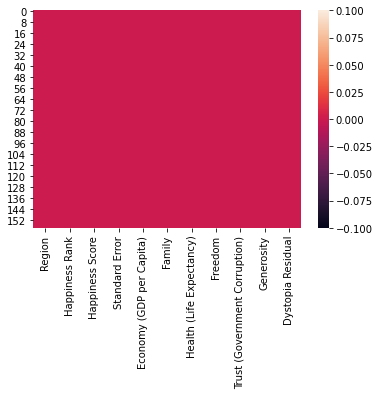

In [18]:
#missing value in data visuvalization
sns.heatmap(df.isnull())

# EDA

UNIVARIATE ANALYSIS USING DISPLACEMENT PLOT

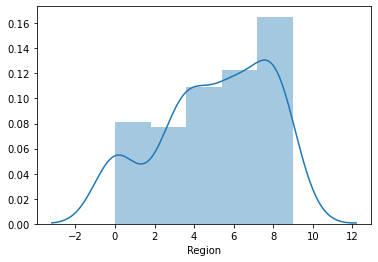

In [19]:
#Region ditribution
sns.distplot(df["Region"])

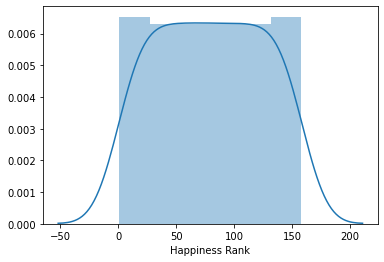

In [20]:
#Happiness Rank ditribution
sns.distplot(df["Happiness Rank"])

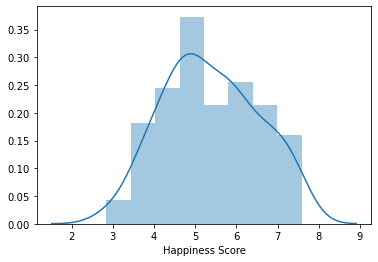

In [21]:
#Happiness Score ditribution
sns.distplot(df["Happiness Score"])

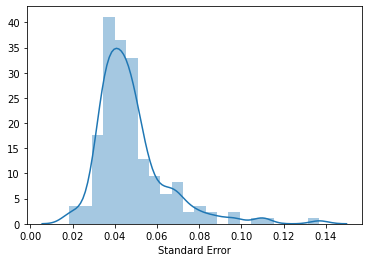

In [22]:
#Standard Error ditribution
sns.distplot(df["Standard Error"])

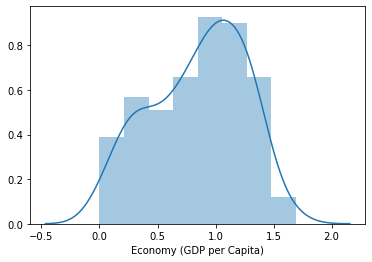

In [23]:
#Economy (GDP per Capita) ditribution
sns.distplot(df["Economy (GDP per Capita)"])

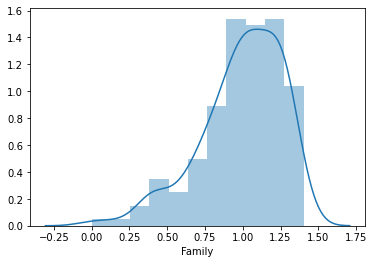

In [24]:
#Family ditribution
sns.distplot(df["Family"])

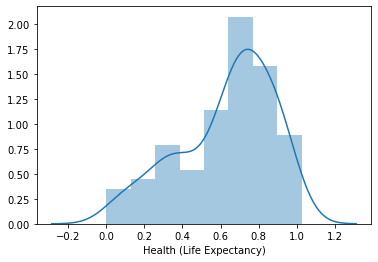

In [25]:
#Health (Life Expectancy) ditribution
sns.distplot(df["Health (Life Expectancy)"])

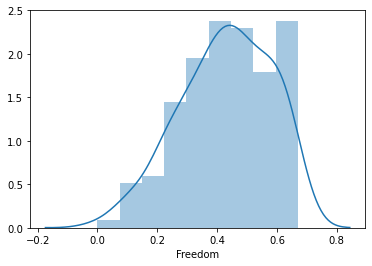

In [26]:
#Freedom ditribution
sns.distplot(df["Freedom"])

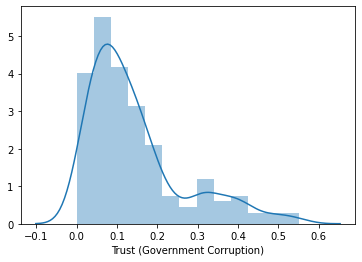

In [27]:
#Trust (Government Corruption) ditribution
sns.distplot(df["Trust (Government Corruption)"])

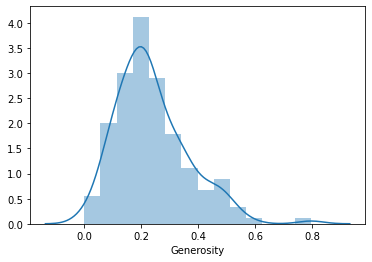

In [28]:
#Generosity ditribution
sns.distplot(df["Generosity"])

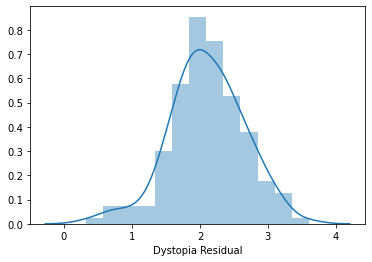

In [29]:
#Dystopia Residual ditribution
sns.distplot(df["Dystopia Residual"])

KEY OBSERAVATIN FROM THE UNIVARIATE ANALYSIS:
    
The data in the columns["Region","standared error","economy","family distribution","family","Health","freedom","Trust"] is not normalised.The building block is out of the normalised curve 


The data in the columns["Hapiness rank","happiness score","generosity","dystopia Residual"] is almost normalised.
        

# BIVARIATE ANALYSIS USING SCATTER PLOT

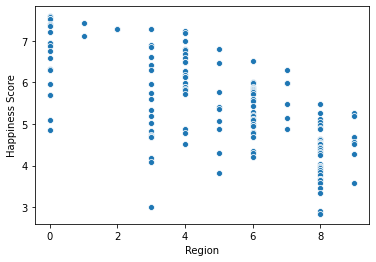

In [30]:
#relation b/w Region and Happiness score
sns.scatterplot(x="Region",y="Happiness Score",data=df)

the regions is not equally distributed. example large number of countries were palced in happiness index from western europen region(0) where in north america(1) very few were place 

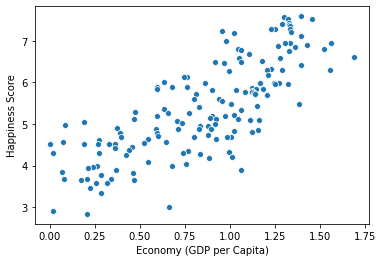

In [31]:
#relation b/w Economy and Happiness score
sns.scatterplot(x="Economy (GDP per Capita)",y="Happiness Score",data=df)

the relation b/w Economy and Happiness score shows linear regression.

i.e when economy of the country increases, the happiness score increases

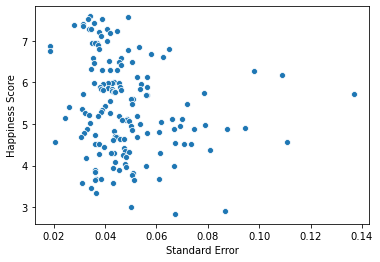

In [32]:
#relation b/w Standard error and Happiness score
sns.scatterplot(x="Standard Error",y="Happiness Score",data=df)

relation b/w Standard error and Happiness score shows it is not distributed very well.which indicates outliers and skewness may present

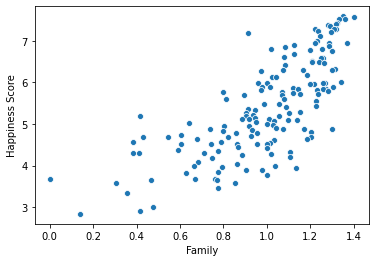

In [33]:
#relation b/w Family and Happiness score
sns.scatterplot(x="Family",y="Happiness Score",data=df)

The graph shows when the value of family increases the happiness score increases(linearly distributed)

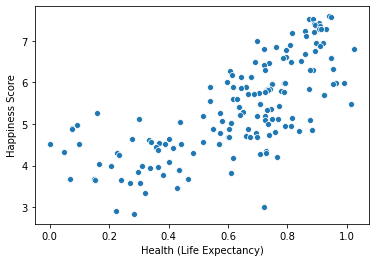

In [34]:
#relation b/w Health(Life Expectancy) and Happiness score
sns.scatterplot(x="Health (Life Expectancy)",y="Happiness Score",data=df)

it shows when life expectancy of the people is more, then more is their happiness

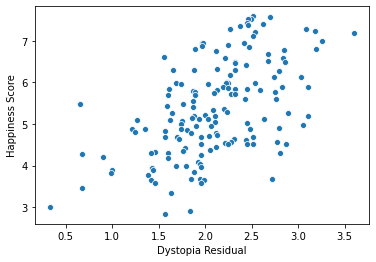

In [35]:
#relation b/w Dystopia residual and Happiness score
sns.scatterplot(x="Dystopia Residual",y="Happiness Score",data=df)

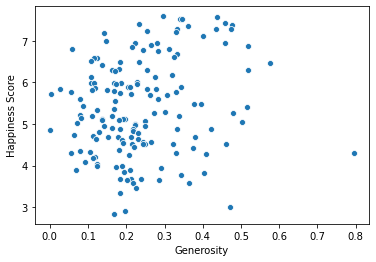

In [36]:
#relation b/w Generosity and Happiness score
sns.scatterplot(x="Generosity",y="Happiness Score",data=df)

from both dystopia residual and generosity graph we say that the value is irregularly distributed

# correlation values


In [37]:
#Multivariate analysis
cor=df.corr()
cor

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,0.682942,-0.691704,0.166879,-0.692340,-0.501211,-0.711973,-0.381365,-0.341903,-0.163055,-0.146971
Happiness Rank,0.682942,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.691704,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.166879,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.692340,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.501211,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.711973,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.381365,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.341903,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.163055,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


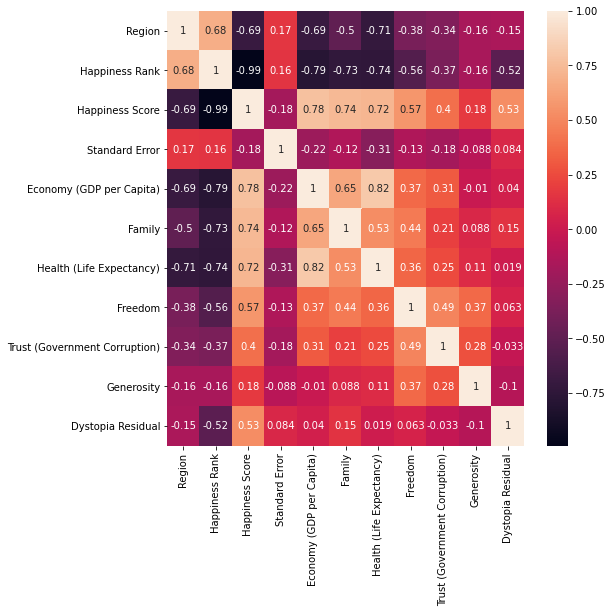

In [38]:
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True)

Key observation

from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation

1)Economy (GDP per Capita)

2)Family

3)Health (Life Expectancy)

4)Freedom  

5)Trust (Government Corruption)  

6)Generosity

6)Dystopia Residual                


columns making negative correlation

1)Region

2)Happiness Rank                   

3)Happiness Score                  

4)Standard Error                   




here 
column["Economy"] is highly correlated in a positive manner with target where 
column["Happiness Score"] is highly correlated in a negative manner target

# plotting outliers

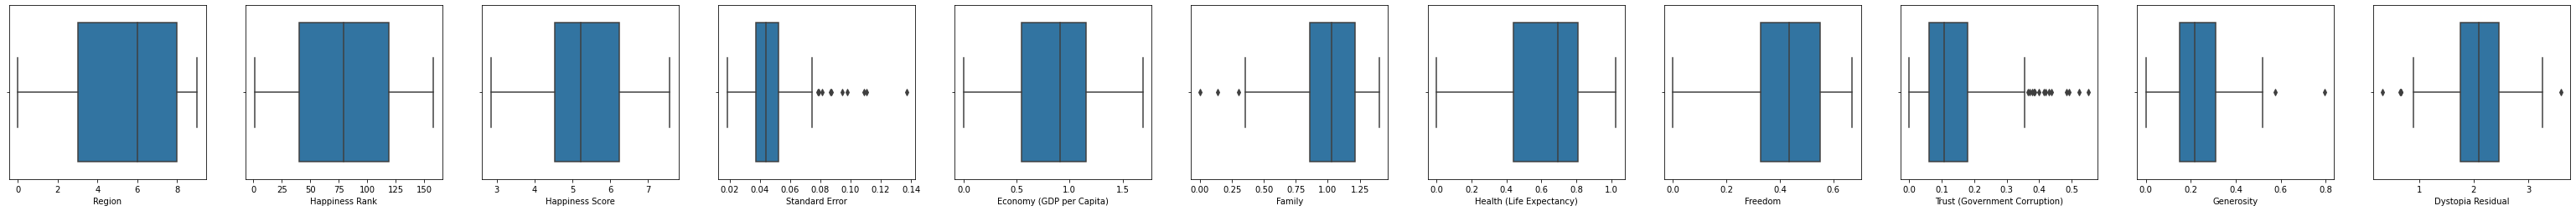

In [39]:
collist=df.columns.values
ncol=15
nrow=10
plt.figure(figsize=(5*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]])



from the above outcome we can see that 

        columns["Standard error","Family",,"Dystopia Residual"] has less outliers
    
        column["Trust(Goverenment Corruption)"] has very high outliers
        
        columns["Region","happiness Rank","Happiness Score","Economy(GDP per capita)","Health","freedom"] has no outliers

# skewness

In [40]:
df.skew()

Region                          -0.477295
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Skewness threshold range : +/-0.5
    
from the above observation we find skewness in many attributes namely
    
    1)Standard Error
    
    2)Family
    
    3)Health (Life Expectancy) 
    
    4)Trust (Government Corruption)
    
    5)Generosity
    
We can  also confirm that there are skewness  from the graphical representaion of the univariate analysis which is displayed 
above

Here the column "Family" , "Health (Life Expectancy) ","Trust (Government Corruption)","Generosity" Have good correlation with the target column. Dropping of such column should not be good approach .

# DATA CLEANING

In [41]:
#COMPARING DATAS WHICH TO BE CLEANED

toclean=pd.DataFrame([["-0.69","Region","no","yes","no"],["-0.99","Happiness Rank","yes","no","no"],["-0.18","Standard error","no","yes","no"]],
                    columns=["Correlation wih target","column name","Normalised","Skewness","Outliers"])
toclean

,Correlation wih target,column name,Normalised,Skewness,Outliers
0,-0.69,Region,no,yes,no
1,-0.99,Happiness Rank,yes,no,no
2,-0.18,Standard error,no,yes,no


The column "Happiness Rank" is highly correlated in negative manner. But correlated in some way

The column "Region" and "Standard error" is negatively correlated and is not normalised

so dropping column "Region" and "Standard error" as dataset demands

# Dropping columns not related to target

In [42]:
df.drop(["Region","Standard Error","Happiness Rank"], axis=1, inplace=True)


In [43]:
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# REMOVING OUTLIERS

Z SCORE TECHNIQUE

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(158, 8)

In [45]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [46]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(152, 8)

percentage data loss

In [47]:
loss_percentage=(158-152)/158*100
loss_percentage

3.79746835443038

In [48]:
df_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# preparing dataset for model training

seperating independent and dependent variable

In [49]:
x=df_new.drop(["Happiness Score"],axis=1)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [50]:
y=df_new["Happiness Score"]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 152, dtype: float64

# Removing skewness using power transform

In [51]:
#Transforming data to remove skewness
from sklearn.preprocessing import power_transform
x=power_transform(x, method='yeo-johnson',standardize=True, copy=True)
x


array([[ 1.49611066,  1.66761863,  1.48143363, ...,  1.82206989,
         0.65595135,  0.74453432],
       [ 1.19771755,  2.02101055,  1.52291872, ...,  0.35523025,
         1.57166845,  1.10426166],
       [ 1.27024567,  1.74015288,  1.06659878, ...,  1.95457488,
         0.97742359,  0.69531125],
       ...,
       [-1.35114937, -2.09149028, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.41833371, -2.01503268, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827055, -1.91154627, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

# StandardScaler 

It removes the mean and scales each feature/variable to unit variance.

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[ 1.49611066,  1.66761863,  1.48143363, ...,  1.82206989,
         0.65595135,  0.74453432],
       [ 1.19771755,  2.02101055,  1.52291872, ...,  0.35523025,
         1.57166845,  1.10426166],
       [ 1.27024567,  1.74015288,  1.06659878, ...,  1.95457488,
         0.97742359,  0.69531125],
       ...,
       [-1.35114937, -2.09149028, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.41833371, -2.01503268, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827055, -1.91154627, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

Data cleaning process is done .lets proceed for testing and training

# splitting the testing and training data

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [54]:
lr=LinearRegression()
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state:",i,"\nThe model performs well")
        print("training r2 score is : ",r2_score(y_train,pred_train)*100)
        print("testing r2 score is : ",r2_score(y_test,pred_test)*100)

At random state: 0 
The model performs well
training r2 score is :  99.42960124884
testing r2 score is :  99.3833324441092
At random state: 2 
The model performs well
training r2 score is :  99.40485529357551
testing r2 score is :  99.42662590809259
At random state: 4 
The model performs well
training r2 score is :  99.3984582164977
testing r2 score is :  99.36872256760144
At random state: 6 
The model performs well
training r2 score is :  99.42646088246495
testing r2 score is :  99.40519226940056
At random state: 15 
The model performs well
training r2 score is :  99.41304830674956
testing r2 score is :  99.4256713599902
At random state: 19 
The model performs well
training r2 score is :  99.41937144718132
testing r2 score is :  99.36569564299998
At random state: 20 
The model performs well
training r2 score is :  99.41787236603403
testing r2 score is :  99.39113158196099
At random state: 21 
The model performs well
training r2 score is :  99.41913273857944
testing r2 score is :  99.3

we will use random state 28 in the train_test_split in next step

In [55]:
#creating train test split using best random state
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=28,test_size=0.20)



In [56]:
x_train

array([[ 1.33846731e-01,  1.45552546e-01, -2.52739034e-01,
        -9.81424564e-01,  6.58065670e-01, -1.47859090e+00,
         5.79004180e-01],
       [ 1.29574169e+00,  1.41102890e+00,  1.41813501e+00,
         1.63816043e+00,  1.64451465e+00,  1.56779292e+00,
         2.58761963e-01],
       [ 1.16240618e+00,  1.38205459e-01,  1.07054479e+00,
        -2.89158975e-01, -3.86379033e-01,  3.15670564e-01,
         3.68342389e-01],
       [ 1.37971965e+00,  1.65054967e-01,  4.40282909e-01,
         1.48037914e+00,  1.53508872e+00, -1.59282293e-02,
         6.62018039e-01],
       [-1.63779472e-01,  1.35753181e+00, -3.17079733e-01,
        -2.65242125e-02, -1.34447654e+00,  9.14320303e-01,
        -1.48528882e+00],
       [ 1.12146980e+00,  1.11494766e+00,  1.50961894e+00,
         8.09515452e-01,  9.11835669e-01, -9.43194185e-01,
         1.52398954e-01],
       [-1.56663712e+00,  4.16900012e-01, -1.25174998e+00,
         1.20230088e-01, -5.16583608e-01,  6.09445623e-01,
        -1.3357506

In [57]:
x_test

array([[ 0.08265696, -0.16405951,  0.36565592, -1.44750368, -1.35466992,
        -0.23013425, -0.20510047],
       [-0.53657293, -0.29734529, -0.57555032,  0.99895844, -0.28970509,
        -0.1077826 ,  1.34166614],
       [-0.7458065 , -0.13941212, -0.25013483, -0.72917518, -1.57040541,
        -0.06963505,  1.89991624],
       [-0.03020044, -0.94657978,  0.71258415, -0.54816875, -0.65263624,
        -0.73064617, -0.4457859 ],
       [-0.46053033,  0.1224688 , -1.85879794, -0.85932241, -1.26367906,
        -0.3236929 ,  0.68505942],
       [-1.13500678, -0.65494584, -1.52774615,  0.37823144, -0.75725327,
        -0.10021631, -0.34706897],
       [ 0.6979919 ,  0.974187  , -0.02101447, -0.48809021, -1.27483458,
        -2.53835806,  0.27318916],
       [-0.31324827,  0.27204122, -0.436381  ,  0.67022864,  0.4836338 ,
         1.81040336, -0.9406598 ],
       [ 0.48233755,  0.76284339,  0.62099302,  0.74738685, -0.22431735,
         0.23680348,  1.39095461],
       [ 1.48968046,  1.0373

In [58]:
y_train

67    5.605
9     7.284
37    6.298
21    6.853
99    4.874
      ...  
3     7.522
33    6.455
22    6.810
5     7.406
1     7.561
Name: Happiness Score, Length: 121, dtype: float64

In [59]:
y_test

86     5.123
50     5.890
51     5.889
94     4.959
100    4.867
132    4.252
63     5.716
78     5.253
24     6.786
14     7.119
152    3.575
54     5.848
89     5.073
123    4.436
57     5.824
82     5.192
55     5.833
15     6.983
106    4.739
130    4.292
149    3.656
134    4.194
138    3.989
104    4.788
0      7.587
68     5.589
60     5.770
74     5.360
77     5.268
79     5.212
36     6.302
Name: Happiness Score, dtype: float64

# Finding best method

1) Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100} and \ndifference={(r2score*100)-(cvscore*100)}")


Accuracy=99.0722519066642,
cross_value_score=99.30570301631876 and 
difference=-0.23345110965455262


2)Lasso Regression

In [61]:
#finding best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [62]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls_pred=ls.predict(x_test)
lss=r2_score(y_test,ls_pred)
for j in range(2,10):
    lsscore=cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:",j)
    print("r2_score is :",lss*100)
    print("cross validation score is : ",lsc*100)
    print("\n")


At cv: 2
r2_score is : 99.07269679001266
cross validation score is :  82.78093670176987


At cv: 3
r2_score is : 99.07269679001266
cross validation score is :  89.55567416044565


At cv: 4
r2_score is : 99.07269679001266
cross validation score is :  83.03942164925418


At cv: 5
r2_score is : 99.07269679001266
cross validation score is :  80.48308489265435


At cv: 6
r2_score is : 99.07269679001266
cross validation score is :  73.10295682529218


At cv: 7
r2_score is : 99.07269679001266
cross validation score is :  59.78760157009992


At cv: 8
r2_score is : 99.07269679001266
cross validation score is :  54.12027850131679


At cv: 9
r2_score is : 99.07269679001266
cross validation score is :  50.30594231271505




we take cv:3 since cross validatin score is higher

In [63]:
print("At cv:",3)
print("r2_score is :",99.45599693283408)
print("cross validation score is : ",63.027492730290334)
    

At cv: 3
r2_score is : 99.45599693283408
cross validation score is :  63.027492730290334


3)Random forest regressor

In [64]:
#finding best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={"criterion":[ "mse" ,"mae"],"n_estimators":[100,200,300,400,500]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 400}


In [65]:
rf=RandomForestRegressor(criterion="mse",n_estimators=300)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)
rfs=r2_score(y_test,rf_pred)
for j in range(2,10):
    rfscore=cross_val_score(rf,x_t,y,cv=j)
    rfcv=rfscore.mean()
    print("At cv:",j)
    print("r2_score is :",rfs*100)
    print("cross validation score is : ",rfcv*100)
    print("\n")


At cv: 2
r2_score is : 93.3262625186239
cross validation score is :  -420.1766689641692


At cv: 3
r2_score is : 93.3262625186239
cross validation score is :  -247.10383883452215


At cv: 4
r2_score is : 93.3262625186239
cross validation score is :  -366.3726721700287


At cv: 5
r2_score is : 93.3262625186239
cross validation score is :  -329.4144877157918


At cv: 6
r2_score is : 93.3262625186239
cross validation score is :  -438.07520783475013


At cv: 7
r2_score is : 93.3262625186239
cross validation score is :  -471.3303746527168


At cv: 8
r2_score is : 93.3262625186239
cross validation score is :  -700.0793945240285


At cv: 9
r2_score is : 93.3262625186239
cross validation score is :  -599.1856560987369




here we find in the random forest regressr the cross validation score is negatively valued when compared with r2_score(accuracy).

# selecting best algorithm

from above three algorithms

1)Linear regression

2)Lasso 

3)random forest regressor

we found that the linear regression model has the almost same value between the accuracy and the cross validation value.

i.e the difference is very low between the twowhich shows we are heading with good approach

so we conclude that the Linear Regression is the best model to predict the best result

# MODEL SAVING

In [66]:
import pickle
filename="World_Happiness_Report.pkl"
pickle.dump(lr,open(filename,"wb"))

# Predicting happiness score with sample data

In [67]:
td=np.array([1.45900,1.33095,0.90503,0.11850,0.4,0.19,1.8330])
td.shape

(7,)

In [68]:
td=td.reshape(1,-1)
td

array([[1.459  , 1.33095, 0.90503, 0.1185 , 0.4    , 0.19   , 1.833  ]])

In [69]:
td.shape

(1, 7)

In [70]:
lr.predict(td)

array([7.5531664])

from the sample data we predicted that the happiness score is around accuracy

# CONCLUSION

In [71]:
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
comparision=pd.DataFrame({"original":a,"prdedicted":predicted},index=range(len(a)))

In [72]:
comparision.head(10)

,original,prdedicted
0,5.123,5.055386
1,5.890,5.812257
2,5.889,5.770908
3,4.959,4.925788
4,4.867,4.900848
5,4.252,4.260190
6,5.716,5.632147
7,5.253,5.117062
8,6.786,6.794180
9,7.119,7.191463
